--- 

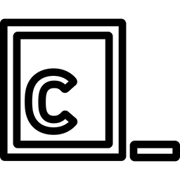

---

# Project: Linear Regression

Reggie is a mad scientist who has been hired by the local fast food joint to build their newest ball pit in the play area. As such, he is working on researching the bounciness of different balls so as to optimize the pit. He is running an experiment to bounce different sizes of bouncy balls, and then fitting lines to the data points he records. He has heard of linear regression, but needs your help to implement a version of linear regression in Python.

_Linear Regression_ is when you have a group of points on a graph, and you find a line that approximately resembles that group of points. A good Linear Regression algorithm minimizes the _error_, or the distance from each point to the line. A line with the least error is the line that fits the data the best. We call this a line of _best fit_.

We will use loops, lists, and arithmetic to create a function that will find a line of best fit when given a set of data.


## Part 1: Calculating Error


The line we will end up with will have a formula that looks like:
```
y = m*x + b
```
`m` is the slope of the line and `b` is the intercept, where the line crosses the y-axis.

Fill in the function called `get_y()` that takes in `m`, `b`, and `x`. It should return what the `y` value would be for that `x` on that line!


In [1]:
def get_y(m,b,x):
  y = m*x + b
  return(y)

print(get_y(1, 0, 7) == 7)
print(get_y(5, 10, 3) == 25)


True
True



Reggie wants to try a bunch of different `m` values and `b` values and see which line produces the least error. To calculate error between a point and a line, he wants a function called `calculate_error()`, which will take in `m`, `b`, and an [x, y] point called `point` and return the distance between the line and the point.

To find the distance:
1. Get the x-value from the point and store it in a variable called `x_point`
2. Get the y-value from the point and store it in a variable called `y_point`
3. Use `get_y()` to get the y-value that `x_point` would be on the line
4. Find the difference between the y from `get_y` and `y_point`
5. Return the absolute value of the distance (you can use the built-in function `abs()` to do this)

The distance represents the error between the line `y = m*x + b` and the `point` given.


In [2]:
#Write your calculate_error() function here
def calculate_error(m,b,point):
  x_point = point[0] 
  y_point = point[1]
  distance = abs(y_point - get_y(m,b,x_point))
  return(distance)

Let's test this function!

In [4]:
#this is a line that looks like y = x, so (3, 3) should lie on it. thus, error should be 0:
print(calculate_error(1, 0, (3, 3)))
#the point (3, 4) should be 1 unit away from the line y = x:
print(calculate_error(1, 0, (3, 4)))
#the point (3, 3) should be 1 unit away from the line y = x - 1:
print(calculate_error(1, -1, (3, 3)))
#the point (3, 3) should be 5 units away from the line y = -x + 1:
print(calculate_error(-1, 1, (3, 3)))

0
1
1
5


Great! Reggie's datasets will be sets of points. For example, he ran an experiment comparing the width of bouncy balls to how high they bounce:


In [5]:
datapoints = [(1, 2), (2, 0), (3, 4), (4, 4), (5, 3)]

The first datapoint, `(1, 2)`, means that his 1cm bouncy ball bounced 2 meters. The 4cm bouncy ball bounced 4 meters.

As we try to fit a line to this data, we will need a function called `calculate_all_error`, which takes `m` and `b` that describe a line, and `points`, a set of data like the example above.

`calculate_all_error` should iterate through each `point` in `points` and calculate the error from that point to the line (using `calculate_error`). It should keep a running total of the error, and then return that total after the loop.


In [6]:
#Write your calculate_all_error function here
def calculate_all_error(m,b,points):
  total=0
  for point in points:
    total += calculate_error(m,b,point)

  return(total)

Let's test this function!

In [7]:
#every point in this dataset lies upon y=x, so the total error should be zero:
datapoints = [(1, 1), (3, 3), (5, 5), (-1, -1)]
print(calculate_all_error(1, 0, datapoints))

#every point in this dataset is 1 unit away from y = x + 1, so the total error should be 4:
datapoints = [(1, 1), (3, 3), (5, 5), (-1, -1)]
print(calculate_all_error(1, 1, datapoints))

#every point in this dataset is 1 unit away from y = x - 1, so the total error should be 4:
datapoints = [(1, 1), (3, 3), (5, 5), (-1, -1)]
print(calculate_all_error(1, -1, datapoints))


#the points in this dataset are 1, 5, 9, and 3 units away from y = -x + 1, respectively, so total error should be
# 1 + 5 + 9 + 3 = 18
datapoints = [(1, 1), (3, 3), (5, 5), (-1, -1)]
print(calculate_all_error(-1, 1, datapoints))

0
4
4
18


Great! It looks like we now have a function that can take in a line and Reggie's data and return how much error that line produces when we try to fit it to the data.

Our next step is to find the `m` and `b` that minimizes this error, and thus fits the data best!


## Part 2: Try a bunch of slopes and intercepts!


The way Reggie wants to find a line of best fit is by trial and error. He wants to try a bunch of different slopes (`m` values) and a bunch of different intercepts (`b` values) and see which one produces the smallest error value for his dataset.

Using a list comprehension, let's create a list of possible `m` values to try. Make the list `possible_ms` that goes from -10 to 10 inclusive, in increments of 0.1.

Hint (to view this hint, either double-click this cell or highlight the following white space): <font color="white">you can go through the values in range(-100, 100) and multiply each one by 0.1</font>



In [8]:
possible_ms = [x/10 for x in range(-100,101,1)]

Now, let's make a list of `possible_bs` to check that would be the values from -20 to 20 inclusive, in steps of 0.1:

In [9]:
possible_bs = [x/10 for x in range(-200,201,1)]

We are going to find the smallest error. First, we will make every possible `y = m*x + b` line by pairing all of the possible `m`s with all of the possible `b`s. Then, we will see which `y = m*x + b` line produces the smallest total error with the set of data stored in `datapoint`.

First, create the variables that we will be optimizing:
* `smallest_error` &mdash; this should start at infinity (`float("inf")`) so that any error we get at first will be smaller than our value of `smallest_error`
* `best_m` &mdash; we can start this at `0`
* `best_b` &mdash; we can start this at `0`

We want to:
* Iterate through each element `m` in `possible_ms`
* For every `m` value, take every `b` value in `possible_bs`
* If the value returned from `calculate_all_error` on this `m` value, this `b` value, and `datapoints` is less than our current `smallest_error`,
* Set `best_m` and `best_b` to be these values, and set `smallest_error` to this error.

By the end of these nested loops, the `smallest_error` should hold the smallest error we have found, and `best_m` and `best_b` should be the values that produced that smallest error value.

Print out `best_m`, `best_b` and `smallest_error` after the loops.



In [11]:
smallest_error = float('inf')
best_m = 0
best_b = 0

for m in possible_ms:
    for b in possible_bs:
        error = calculate_all_error(m,b,datapoints)
        if error < smallest_error:
            smallest_error = error
            best_m = m
            best_b = b
            
print(best_m)
print(best_b)
print(smallest_error)

1.0
0.0
0.0


## Part 3: What does our model predict?

Now we have seen that for this set of observations on the bouncy balls, the line that fits the data best has an `m` of 0.3 and a `b` of 1.7:

```
y = 0.3x + 1.7
```

This line produced a total error of 5.

Using this `m` and this `b`, what does your line predict the bounce height of a ball with a width of 6 to be?
In other words, what is the output of `get_y()` when we call it with:
* m = 0.3
* b = 1.7
* x = 6

In [13]:
print(get_y(0.3,1.7,6))

3.5


Our model predicts that the 6cm ball will bounce 3.5m.

Now, Reggie can use this model to predict the bounce of all kinds of sizes of balls he may choose to include in the ball pit!